# 小さい分光器でネオンのcalibrationをする

In [2]:
%pylab inline
!pip install netcdf4

import os
from os.path import join
import xarray as xr
from google.colab import drive
import csv
from pandas import read_csv
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib
     |████████████████████████████████| 4.3MB 2.8MB/s 
     |████████████████████████████████| 296kB 28.8MB/s 


In [3]:
drive.mount('/content/drive')
bpth = join('drive', 'My Drive', '研究室', 'MyLeprecon')
H_filepath = join(bpth, 'SpectrometerData', '20201016', 'H-spectrum.txt')
Ne_filepath = join(bpth, 'SpectrometerData', '20201016', 'Ne-spectrum.txt')

Mounted at /content/drive


In [4]:
h_csv = read_csv(H_filepath, sep=';', skiprows=66)
ne_csv = read_csv(Ne_filepath, sep=';', skiprows=66)

h_csv["Wavelength"] = pd.to_numeric(h_csv["Wavelength"], errors="coerce")
ne_csv["Wavelength"] = pd.to_numeric(ne_csv["Wavelength"], errors="coerce")

# plot(h_csv["Wavelength"], h_csv["Raw data #1"])
# plot(ne_csv["Wavelength"], ne_csv["Raw data #1"])

## 二つの分光器のスペクトル比較
大きい方のスペクトルは(未calibration)


(556.0, 708.0)

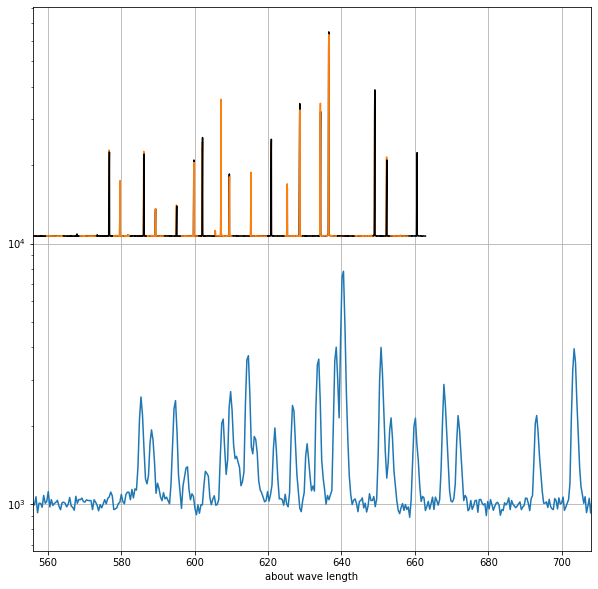

In [5]:
specpath = join(bpth, 'SpectrometerData', '20201006-2')
R = [f'Ne_{410000 + 5000*i}.nc' for i in range(50)]

index = np.array([415000,460000, 490000, 550000, 600000])
overlap = np.array([1040, 1000, 978, 954, 930])
fun = np.poly1d(np.polyfit(index, overlap, 2))

rs = [2504, 38525]
balmers = [656, 486.135]
function = np.poly1d(np.polyfit(rs, balmers, 1))

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = function(x_range + overlap)
    y = image_data.sum(axis=0)
    plot(x, y / 1e2, f'{c}')

plot(ne_csv["Wavelength"], ne_csv["Raw data #1"])

grid()
yscale('log')
xlabel('about wave length')
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([10,10])

xlim(556, 708)

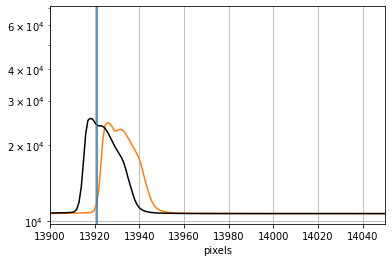

In [6]:
x_range = np.arange(2048)
R = [f'Ne_{410000 + 5000*i}.nc' for i in range(50)]
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap

    y = image_data.sum(axis=0)

    plot(x, y / 1e2, f'{c}')

grid()
yscale('log')
xlabel('pixels')

xlim(13900, 14050)
#axvline(1525)
axvline(3968)
axvline(6625)
axvline(11115)
axvline(12845)
axvline(13921)
axvline(14415)
axvline(15417)
axvline(17305)
axvline(18680)

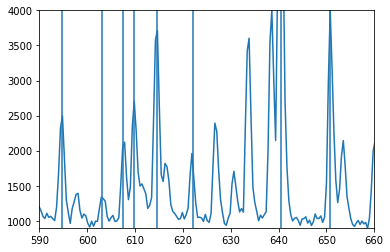

In [7]:
plot(ne_csv["Wavelength"], ne_csv["Raw data #1"])
#xlim(607, 610)
xlim(590, 660)
ylim(900, 4000)
axvline(588.3)
axvline(594.7)
axvline(603)
axvline(607.5)
axvline(609.8)
axvline(614.5)
axvline(622)
axvline(640.5)
axvline(650.8)

| pixels | wave length(nm) |
| -- | -- |
| 3968 | 650.8 |
| 6625 | 640.5 |
| 11115 | 622.0 |
| 12845 | 614.5 |
| 13921 | 609.8 |
| 14415 | 607.5 |
| 15417 | 603 |
| 17305 | 594.7 |
| 18680 | 588.3 |

## ピクセル値と波長の関係

1nm相当のpixel数: 235.392


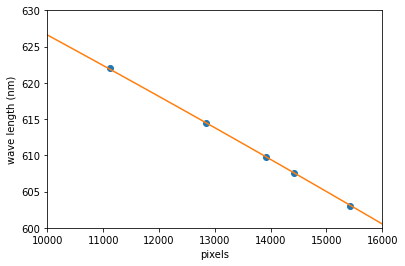

In [8]:
pixels = np.array([3968, 6625, 11115, 12845, 13921, 14415, 15417, 17305, 18680])
wave_length = np.array([650.8, 640.5, 622.0, 614.5, 609.8, 607.5, 603, 594.7, 588.3])
plot(pixels, wave_length, 'o')

pixels_to_wave_length_func = np.poly1d(np.polyfit(pixels, wave_length, 2))
x = np.linspace(3500, 20000, 100)
plot(x, pixels_to_wave_length_func(x))

xlabel('pixels')
ylabel('wave length (nm)')
xlim(10000, 16000)
ylim(600, 630)
print("1nm相当のpixel数:", end=' ')
print(-(pixels[0]-pixels[8])/(wave_length[0]-wave_length[8]))

## 水素スペクトルのcalibration

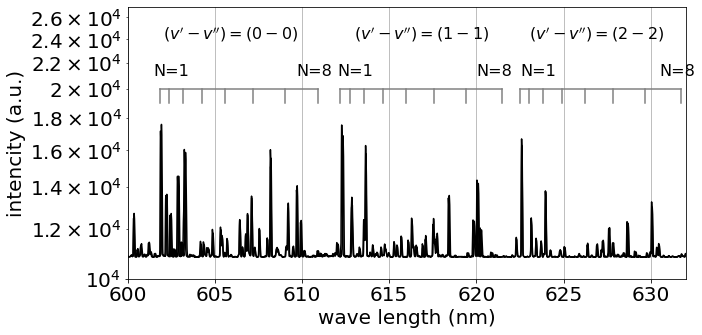

In [9]:
rcParams['font.size'] = 20
figure(figsize=[10, 5])
x_range = np.arange(2048)
R = [f'H_{410000 + 5000*i}.nc' for i in range(50)]
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
#    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = pixels_to_wave_length_func(x_range + overlap)

    y = image_data.sum(axis=0)

    plot(x, y / 1e2, f'{c}')

grid()
yscale('log')
xlabel('wave length (nm)')
ylabel('intencity (a.u.)')

xlim(600, 632)
ylim(1e4, 2.7*1e4)

plot([601.8299, 601.8299], [1.9*1e4, 2*1e4], color='gray')
plot([602.3757, 602.3757], [1.9*1e4, 2*1e4], color='gray')
plot([603.1909, 603.1909], [1.9*1e4, 2*1e4], color='gray')
plot([604.2716, 604.2716], [1.9*1e4, 2*1e4], color='gray')
plot([605.6091, 605.6091], [1.9*1e4, 2*1e4], color='gray')
plot([607.1996, 607.1996], [1.9*1e4, 2*1e4], color='gray')
plot([609.0374, 609.0374], [1.9*1e4, 2*1e4], color='gray')
plot([610.9030, 610.9030], [1.9*1e4, 2*1e4], color='gray')
plot([601.8299, 610.9030], [2*1e4, 2*1e4], color='gray')
text(602, 2.4*1e4, "$(v'-v'')=(0-0)$", fontsize=16)
text(601.5, 2.1*1e4, 'N=1', fontsize=16)
text(609.7, 2.1*1e4, 'N=8', fontsize=16)

plot([612.1787, 612.1787], [1.9*1e4, 2*1e4], color='gray')
plot([612.7246, 612.7246], [1.9*1e4, 2*1e4], color='gray')
plot([613.5395, 613.5395], [1.9*1e4, 2*1e4], color='gray')
plot([614.6186, 614.6186], [1.9*1e4, 2*1e4], color='gray')
plot([615.9565, 615.9565], [1.9*1e4, 2*1e4], color='gray')
plot([617.5462, 617.5462], [1.9*1e4, 2*1e4], color='gray')
plot([619.3812, 619.3812], [1.9*1e4, 2*1e4], color='gray')
plot([621.4507, 621.4507], [1.9*1e4, 2*1e4], color='gray')
plot([612.1787, 621.4507], [2*1e4, 2*1e4], color='gray')
text(613, 2.4*1e4, "$(v'-v'')=(1-1)$", fontsize=16)
text(612, 2.1*1e4, 'N=1', fontsize=16)
text(620.0, 2.1*1e4, 'N=8', fontsize=16)

plot([622.4815, 622.4815], [1.9*1e4, 2*1e4], color='gray')
plot([623.0258, 623.0258], [1.9*1e4, 2*1e4], color='gray')
plot([623.8391, 623.8391], [1.9*1e4, 2*1e4], color='gray')
plot([624.9150, 624.9150], [1.9*1e4, 2*1e4], color='gray')
plot([626.2495, 626.2495], [1.9*1e4, 2*1e4], color='gray')
plot([627.8369, 627.8369], [1.9*1e4, 2*1e4], color='gray')
plot([629.6622, 629.6622], [1.9*1e4, 2*1e4], color='gray')
plot([631.7233, 631.7233], [1.9*1e4, 2*1e4], color='gray')
plot([622.4815, 631.7233], [2*1e4, 2*1e4], color='gray')
text(623, 2.4*1e4, "$(v'-v'')=(2-2)$", fontsize=16)
text(622.5, 2.1*1e4, 'N=1', fontsize=16)
text(630.5, 2.1*1e4, 'N=8', fontsize=16)

savefig(join('drive', 'My Drive', '研究室', 'images','qbranch'), bbox_inches='tight')

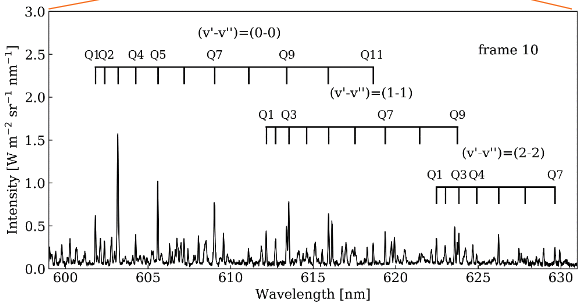

In [10]:
from IPython.display import Image
Image(join(bpth, "ishihara-spectrum.png"))